In [ ]:
# conda env monte-prob

# 몬테카를로 시뮬레이션으로 배우는 확률 통계 (연속형 분포 샘플링)


In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3,2)

## 정규형 분포 샘플링 by MCMC

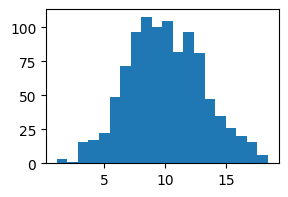

In [7]:
def pseudo_sample(x0 = 16809,
                  mod = (2**31)-1,
                  seed = 1234567,
                  size = 1):
    res = []
    x = (seed*x0 + 1)%mod
    u = x/mod
    res.append(u)
    for i in range(1, size):
        x = (seed*x + 1)%mod
        u = x/mod
        res.append(u)
    return res

def uniform_cont(low=0, high=1, seed=1234567, size=1):
    s_list = pseudo_sample(seed=seed, size=size)
    res = [low+(high-low)*s for s in s_list]
    return res

def uniform_disc(low=0, high=1, seed=1234567, size=1):
    s_list = pseudo_sample(seed=seed, size=size)
    res = [int(low+(high-low)*s) for s in s_list]
    return res    

def normal_pdf(mu, s, x):
    pi = 3.1415926535
    e = 2.7182818284
    res = (1/(((2*pi)**0.5)*s)) *(e**(-0.5*((x-mu)/s)**2))
    return res

def normal_sample(mu, s, seed=1234567, size=1):
    burn_in = 100
    size = burn_in + size
    u_list = pseudo_sample(seed=seed+2, size=size)
    xt_candidates = uniform_cont(low=mu-3*s, high=mu+3*s, size=size)
    x0=mu
    xt=x0
    res=[]
    
    for i in range(0, size):
        xt_candidate = xt_candidates[i]
        pi_y = normal_pdf(mu, s, xt_candidate)
        pi_x = normal_pdf(mu, s, xt)
        accept_prob = pi_y/pi_x
        if u_list[i] < accept_prob:
            xt = xt_candidate
        res.append(xt)
    res = res[burn_in:]
    return res
samples = normal_sample(mu=10, s=3, size=1000)
plt.hist(samples, bins=20)
plt.show()

## 감마 분포 샘플링

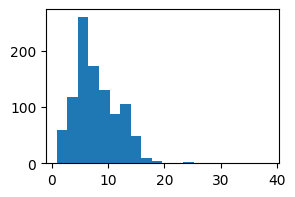

In [10]:
def seq(start, stop, step):
    res = []
    current = start
    while current < stop:
        res.append(current)
        current += step
    return res


def gamma_function(alpha, x):
    e = 2.7182818284
    res = (x**(alpha-1)*(e**(-x)))
    return res

def gamma(alpha):
    a = 0
    b = 100
    x_list = seq(a+0.0001, b, 0.001)
    
    gamma_list = []
    for x in x_list:
        y = gamma_function(alpha, x)
        gamma_list.append(y)
    res = ((b-a)/len(x_list)*sum(gamma_list))
    return res

def gamma_pdf(alpha, beta, x):
    e = 2.7182818284
    res = (1/(gamma(alpha)*(beta**alpha)))*(x**(alpha-1))*(e**((-1/beta)*x))
    return res


def gamma_sample(alpha, beta, seed=1234567, size=1):
    burn_in = 100
    size = burn_in + size
    u_list = pseudo_sample(seed=seed+2, size=size)
    xt_candidates = uniform_cont(low=0, high=5*alpha*beta, size=size)
    x0=alpha*beta
    xt=x0
    res=[]
    
    for i in range(0, size):
        xt_candidate = xt_candidates[i]
        pi_y = gamma_pdf(alpha, beta, xt_candidate)
        pi_x = gamma_pdf(alpha, beta, xt)
        accept_prob = pi_y/pi_x
        if u_list[i] < accept_prob:
            xt = xt_candidate
        res.append(xt)
    res = res[burn_in:]
    return res
samples = gamma_sample(alpha=4, beta=2, size=1000)
plt.hist(samples, bins=20)
plt.show()

## 지수 분포 샘플링

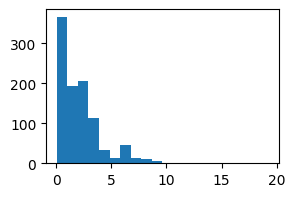

In [11]:
def exponential_pdf(beta, x):
    e = 2.7182818284
    res = (1/beta)*(e**((-1/beta)*x))
    return res

def exponential_sample(beta, seed=1234567, size=1):
    burn_in = 100
    size = burn_in + size
    u_list = pseudo_sample(seed=seed+2, size=size)
    xt_candidates = uniform_cont(low=0, high=10*beta, size=size)
    x0=beta
    xt=x0
    res=[]
    
    for i in range(0, size):
        xt_candidate = xt_candidates[i]
        pi_y = exponential_pdf(beta, xt_candidate)
        pi_x = exponential_pdf(beta, xt)
        accept_prob = pi_y/pi_x
        if u_list[i] < accept_prob:
            xt = xt_candidate
        res.append(xt)
    res = res[burn_in:]
    return res
samples = exponential_sample(beta=2, size=1000)
plt.hist(samples, bins=20)
plt.show()

## 베타 분포 샘플링

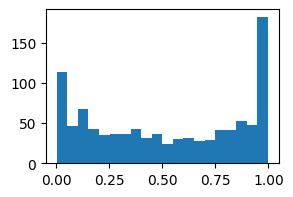

In [12]:
def beta_pdf(alpha, beta, x):
    beta_function = ((gamma(alpha+beta))/(gamma(alpha)*gamma(beta)))
    res = beta_function*(x**(alpha-1))*((1-x)**(beta-1))
    return res

def beta_sample(alpha, beta, seed=1234567, size=1):
    burn_in = 100
    size = burn_in + size
    u_list = pseudo_sample(seed=seed+2, size=size)
    xt_candidates = uniform_cont(low=0, high=1, size=size)
    x0=0.5
    xt=x0
    res=[]
    
    for i in range(0, size):
        xt_candidate = xt_candidates[i]
        pi_y = beta_pdf(alpha, beta, xt_candidate)
        pi_x = beta_pdf(alpha, beta, xt)
        accept_prob = pi_y/pi_x
        if u_list[i] < accept_prob:
            xt = xt_candidate
        res.append(xt)
    res = res[burn_in:]
    return res
samples = beta_sample(alpha=0.5, beta=0.5, size=1000)
plt.hist(samples, bins=20)
plt.show()